In [2]:
# Load data and verify image paths
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

# Base path for Kaggle dataset
base_path = r"E:\CheXpert"

# Paths to CSV files
train_csv = os.path.join(base_path, "train.csv")
valid_csv = os.path.join(base_path, "valid.csv")

# Load CSVs
train_df = pd.read_csv(train_csv)
valid_df = pd.read_csv(valid_csv)

print("Train shape:", train_df.shape)
print("Validation shape:", valid_df.shape)

# Show first few rows
display(train_df.head())


Train shape: (223414, 19)
Validation shape: (234, 19)


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


# a sample code to check the access to the images

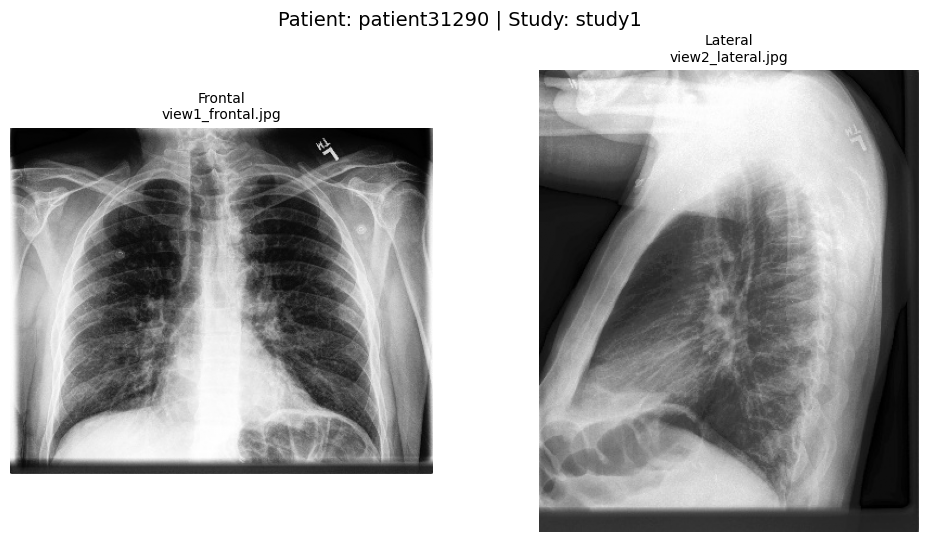

In [4]:
# Display exactly one Frontal and one Lateral image from the dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Base path to train folder
img_base_path = r"E:\CheXpert\train"

# Keep searching until we find a study with both frontal and lateral
while True:
    # Pick a random patient folder
    patient_folder = random.choice(os.listdir(img_base_path))
    patient_path = os.path.join(img_base_path, patient_folder)

    # Pick a random study folder inside that patient
    study_folder = random.choice(os.listdir(patient_path))
    study_path = os.path.join(patient_path, study_folder)

    # List images in that study
    images = os.listdir(study_path)

    # Separate frontal and lateral
    frontal_imgs = [img for img in images if "frontal" in img.lower()]
    lateral_imgs = [img for img in images if "lateral" in img.lower()]

    # If both exist, stop searching
    if frontal_imgs and lateral_imgs:
        chosen_frontal = random.choice(frontal_imgs)
        chosen_lateral = random.choice(lateral_imgs)
        break

# Display one frontal and one lateral
plt.figure(figsize=(12, 6))

for i, img_name in enumerate([chosen_frontal, chosen_lateral]):
    img_path = os.path.join(study_path, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(1, 2, i+1)
    plt.imshow(img, cmap="gray")
    view = "Frontal" if "frontal" in img_name.lower() else "Lateral"
    plt.title(f"{view}\n{img_name}", fontsize=10)
    plt.axis("off")

plt.suptitle(f"Patient: {patient_folder} | Study: {study_folder}", fontsize=14)
plt.show()


# Understand dataset structure

In [5]:

# Check shapes
print("Train shape:", train_df.shape)
print("Validation shape:", valid_df.shape)

# Show all column names
print("\nColumns in train set:")
print(train_df.columns.tolist())
print("\nColumns in val set:")
print(valid_df.columns.tolist())

Train shape: (223414, 19)
Validation shape: (234, 19)

Columns in train set:
['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']

Columns in val set:
['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Path                        223414 non-null  object 
 1   Sex                         223414 no

In [6]:
# Quick info about dataset
print("\nDataset info:")
train_df.info()
valid_df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Path                        223414 non-null  object 
 1   Sex                         223414 non-null  object 
 2   Age                         223414 non-null  int64  
 3   Frontal/Lateral             223414 non-null  object 
 4   AP/PA                       191027 non-null  object 
 5   No Finding                  22381 non-null   float64
 6   Enlarged Cardiomediastinum  44839 non-null   float64
 7   Cardiomegaly                46203 non-null   float64
 8   Lung Opacity                117778 non-null  float64
 9   Lung Lesion                 11944 non-null   float64
 10  Edema                       85956 non-null   float64
 11  Consolidation               70622 non-null   float64
 12  Pneumonia                   27608 non-null   float64
 13 

# ---- Missing values ----

In [10]:
print("🔹 Missing values in Train set:")
print(train_df.isnull().sum())
print("\nMissing values in total")
print(train_df.isnull().sum().sum())
print("\n🔹 Missing values in Validation set:")
print(valid_df.isnull().sum())
print("\nMissing values in total")
print(valid_df.isnull().sum().sum())

🔹 Missing values in Train set:
Path                               0
Sex                                0
Age                                0
Frontal/Lateral                    0
AP/PA                          32387
No Finding                    201033
Enlarged Cardiomediastinum    178575
Cardiomegaly                  177211
Lung Opacity                  105636
Lung Lesion                   211470
Edema                         137458
Consolidation                 152792
Pneumonia                     195806
Atelectasis                   154971
Pneumothorax                  144480
Pleural Effusion               90203
Pleural Other                 216922
Fracture                      211220
Support Devices               100197
dtype: int64

Missing values in total
2310361

🔹 Missing values in Validation set:
Path                           0
Sex                            0
Age                            0
Frontal/Lateral                0
AP/PA                         32
No Finding        

# label distribution for TRAIN and VALID



Detected label columns (train): ['Age', 'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']

🔹 Train label distribution (counts & percentages):


,count_-1,count_0,count_1,count_NaN,total,pct_-1,pct_0,pct_1,pct_NaN
label,,,,,,,,,
Age,0,3,0,0,223414,0.0000,0.0000,0.0000,0.0000
Atelectasis,33739,1328,33376,154971,223414,0.1510,0.0059,0.1494,0.6936
Cardiomegaly,8087,11116,27000,177211,223414,0.0362,0.0498,0.1209,0.7932
Consolidation,27742,28097,14783,152792,223414,0.1242,0.1258,0.0662,0.6839
Edema,12984,20726,52246,137458,223414,0.0581,0.0928,0.2339,0.6153
Enlarged Cardiomediastinum,12403,21638,10798,178575,223414,0.0555,0.0969,0.0483,0.7993
Fracture,642,2512,9040,211220,223414,0.0029,0.0112,0.0405,0.9454
Lung Lesion,1488,1270,9186,211470,223414,0.0067,0.0057,0.0411,0.9465
Lung Opacity,5598,6599,105581,105636,223414,0.0251,0.0295,0.4726,0.4728



🔹 Validation label distribution (counts & percentages):


,count_-1,count_0,count_1,count_NaN,total,pct_-1,pct_0,pct_1,pct_NaN
label,,,,,,,,,
Age,0,0,0,0,234,0.0,0.0000,0.0000,0.0
Atelectasis,0,154,80,0,234,0.0,0.6581,0.3419,0.0
Cardiomegaly,0,166,68,0,234,0.0,0.7094,0.2906,0.0
Consolidation,0,201,33,0,234,0.0,0.8590,0.1410,0.0
Edema,0,189,45,0,234,0.0,0.8077,0.1923,0.0
Enlarged Cardiomediastinum,0,125,109,0,234,0.0,0.5342,0.4658,0.0
Fracture,0,234,0,0,234,0.0,1.0000,0.0000,0.0
Lung Lesion,0,233,1,0,234,0.0,0.9957,0.0043,0.0
Lung Opacity,0,108,126,0,234,0.0,0.4615,0.5385,0.0


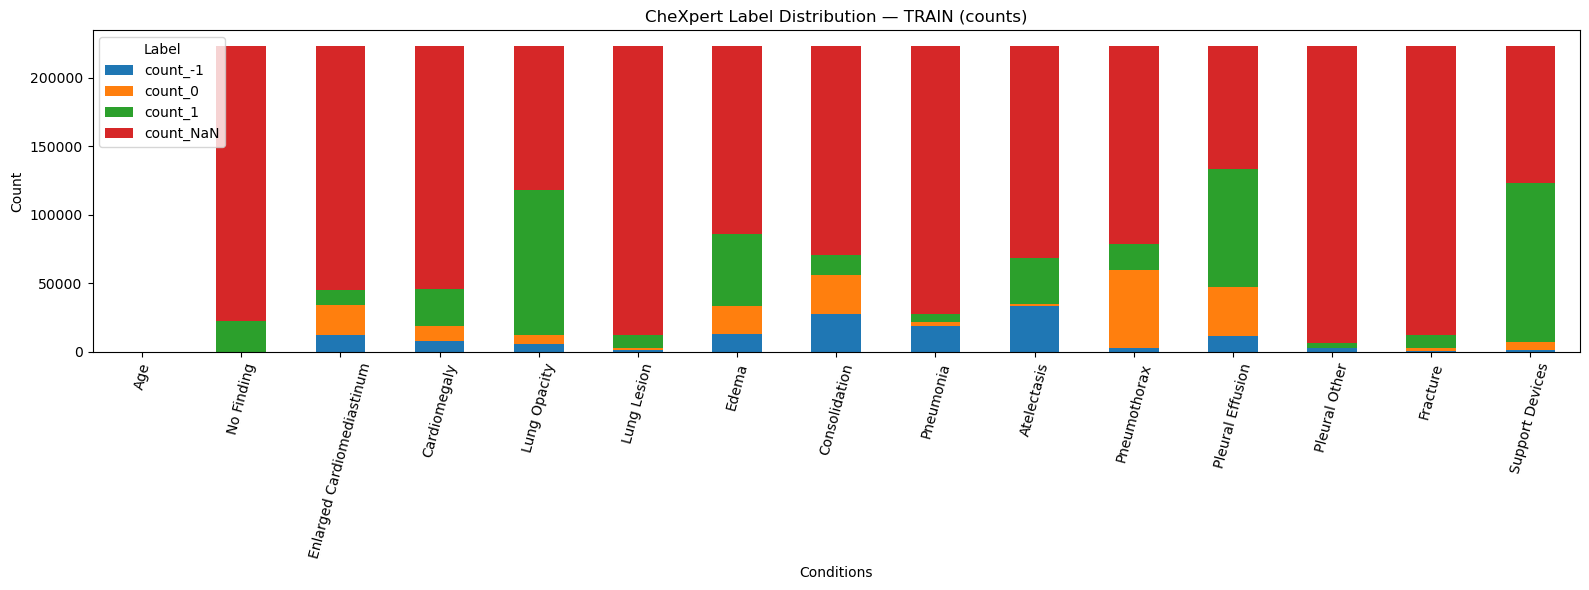

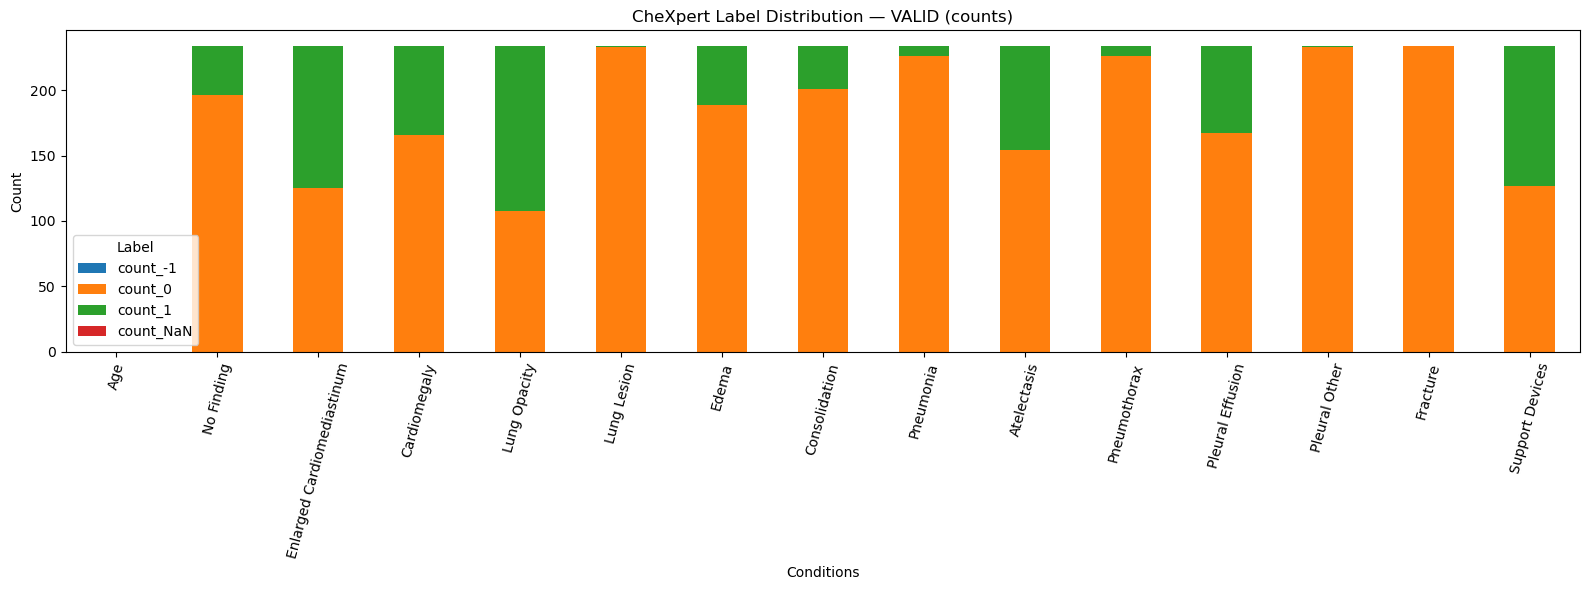

In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Identify label columns robustly: numeric columns (CheXpert labels are numeric: -1/0/1/NaN)
def get_label_cols(df):
    return [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]

label_cols_train = get_label_cols(train_df)
label_cols_valid = [c for c in get_label_cols(valid_df) if c in label_cols_train]  # keep overlap

print("\nDetected label columns (train):", label_cols_train)

# Helper: build a tidy table with counts of -1, 0, 1, NaN
def label_distribution_table(df, label_cols):
    rows = []
    for col in label_cols:
        ser = df[col]
        rows.append({
            "label": col,
            "count_-1": int((ser == -1).sum()),
            "count_0":  int((ser == 0).sum()),
            "count_1":  int((ser == 1).sum()),
            "count_NaN": int(ser.isna().sum()),
            "total":     int(ser.shape[0])
        })
    dist = pd.DataFrame(rows).set_index("label")
    # Add percentages for convenience
    for k in ["count_-1", "count_0", "count_1", "count_NaN"]:
        dist[k.replace("count", "pct")] = (dist[k] / dist["total"]).round(4)
    return dist

train_dist = label_distribution_table(train_df, label_cols_train)
valid_dist = label_distribution_table(valid_df, label_cols_valid)

print("\n🔹 Train label distribution (counts & percentages):")
display(train_dist.sort_index())

print("\n🔹 Validation label distribution (counts & percentages):")
display(valid_dist.sort_index())

# Stacked bar plots (counts) — safe because all columns are numeric now
def plot_stacked_counts(dist_df, title):
    plot_df = dist_df[["count_-1","count_0","count_1","count_NaN"]]
    plot_df.plot(kind="bar", stacked=True, figsize=(16,6), title=title)
    plt.xlabel("Conditions"); plt.ylabel("Count"); plt.xticks(rotation=75); plt.legend(title="Label")
    plt.tight_layout(); plt.show()

plot_stacked_counts(train_dist, "CheXpert Label Distribution — TRAIN (counts)")
plot_stacked_counts(valid_dist, "CheXpert Label Distribution — VALID (counts)")

# Class imbalance analysis


🔹 Class balance summary for Train:


,Positives,Negatives,Prevalence(%)
Condition,,,
No Finding,22381,0,100.00
Atelectasis,33376,1328,96.17
Support Devices,116001,6137,94.98
Lung Opacity,105581,6599,94.12
Pleural Other,3523,316,91.77
Lung Lesion,9186,1270,87.85
Fracture,9040,2512,78.25
Edema,52246,20726,71.60
Pleural Effusion,86187,35396,70.89


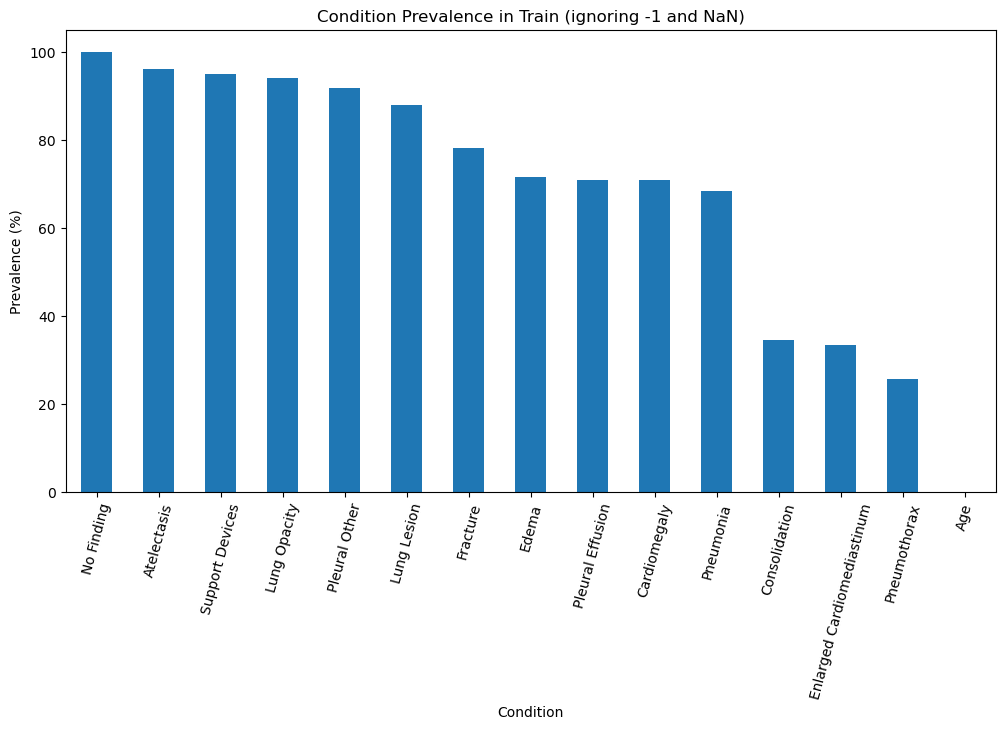


🔹 Class balance summary for Validation:


,Positives,Negatives,Prevalence(%)
Condition,,,
Lung Opacity,126,108,53.85
Enlarged Cardiomediastinum,109,125,46.58
Support Devices,107,127,45.73
Atelectasis,80,154,34.19
Cardiomegaly,68,166,29.06
Pleural Effusion,67,167,28.63
Edema,45,189,19.23
No Finding,38,196,16.24
Consolidation,33,201,14.10


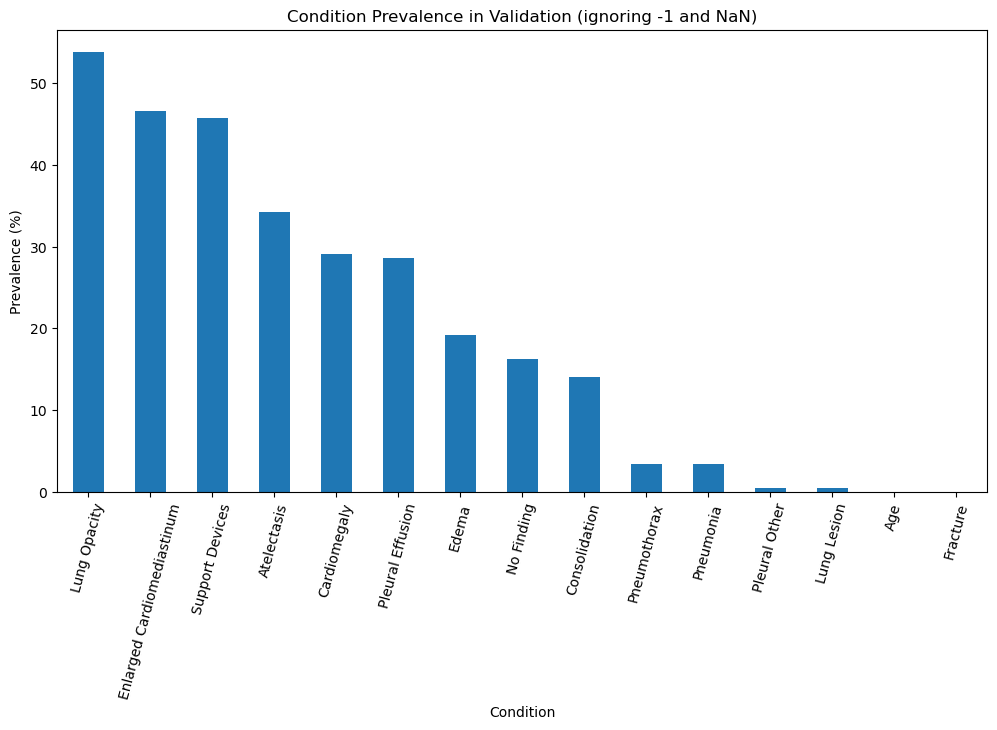

In [12]:

import matplotlib.pyplot as plt

def class_imbalance(df, label_cols, dataset_name):
    rows = []
    for col in label_cols:
        ser = df[col].dropna()           # drop NaN
        ser = ser[ser != -1]             # drop uncertain
        positives = (ser == 1).sum()
        negatives = (ser == 0).sum()
        total = positives + negatives
        prevalence = positives / total if total > 0 else 0
        rows.append({
            "Condition": col,
            "Positives": positives,
            "Negatives": negatives,
            "Prevalence(%)": round(prevalence * 100, 2)
        })
    dist = pd.DataFrame(rows).set_index("Condition").sort_values("Prevalence(%)", ascending=False)

    print(f"\n🔹 Class balance summary for {dataset_name}:")
    display(dist)

    # Bar plot: prevalence
    plt.figure(figsize=(12,6))
    dist["Prevalence(%)"].plot(kind="bar")
    plt.title(f"Condition Prevalence in {dataset_name} (ignoring -1 and NaN)")
    plt.ylabel("Prevalence (%)")
    plt.xlabel("Condition")
    plt.xticks(rotation=75)
    plt.show()

    return dist

train_balance = class_imbalance(train_df, label_cols_train, "Train")
valid_balance = class_imbalance(valid_df, label_cols_valid, "Validation")


# Compare Train vs Validation class prevalence

🔹 Train vs Validation prevalence comparison (%):


,Train %,Valid %
Condition,,
Age,0.00,0.00
Atelectasis,96.17,34.19
Cardiomegaly,70.84,29.06
Consolidation,34.48,14.10
Edema,71.60,19.23
Enlarged Cardiomediastinum,33.29,46.58
Fracture,78.25,0.00
Lung Lesion,87.85,0.43
Lung Opacity,94.12,53.85


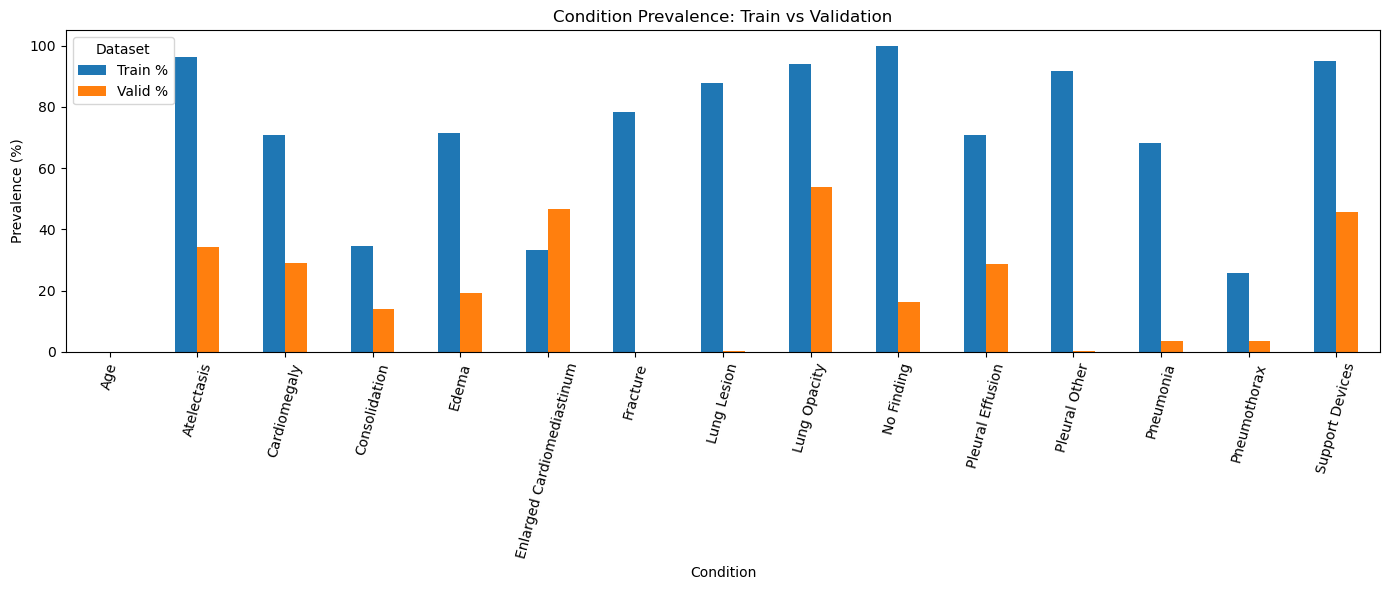

In [13]:

def compare_train_valid(train_balance, valid_balance):
    # Merge both prevalence tables
    comp = train_balance[["Prevalence(%)"]].rename(columns={"Prevalence(%)": "Train %"})
    comp = comp.join(valid_balance[["Prevalence(%)"]].rename(columns={"Prevalence(%)": "Valid %"}), how="outer")

    # Fill missing with 0 (in case a label doesn't exist in one set)
    comp = comp.fillna(0)

    print("🔹 Train vs Validation prevalence comparison (%):")
    display(comp)

    # Plot
    comp.plot(kind="bar", figsize=(14,6))
    plt.title("Condition Prevalence: Train vs Validation")
    plt.ylabel("Prevalence (%)")
    plt.xlabel("Condition")
    plt.xticks(rotation=75)
    plt.legend(title="Dataset")
    plt.tight_layout()
    plt.show()

    return comp

comparison = compare_train_valid(train_balance, valid_balance)


# Multi-label correlation heatmap with correlation values

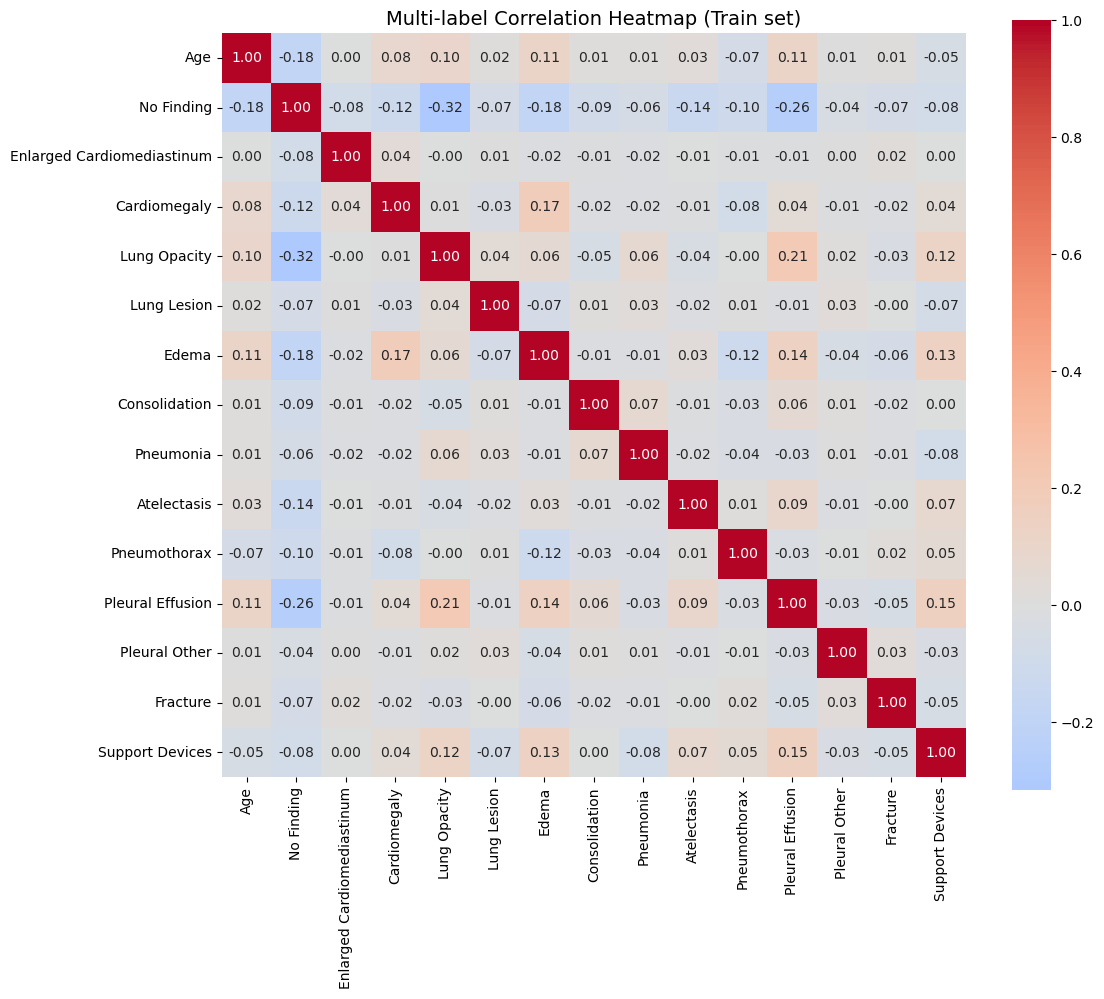

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Detect label columns (numeric only)
label_cols = [c for c in train_df.columns if pd.api.types.is_numeric_dtype(train_df[c])]

# 2) Copy and clean labels (treat -1 and NaN as 0 for correlation)
train_labels = train_df[label_cols].copy()
train_labels = train_labels.fillna(0).replace(-1, 0)

# 3) Compute correlation
corr_matrix = train_labels.corr()

# 4) Plot heatmap with values
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,        # show correlation numbers
    fmt=".2f",         # 2 decimal places
    cbar=True,
    square=True
)
plt.title("Multi-label Correlation Heatmap (Train set)", fontsize=14)
plt.show()


# Find max correlation per feature (ignoring self = 1.0)

In [15]:
max_corrs = []
for col in corr_matrix.columns:
    corr_values = corr_matrix[col].drop(col)  # drop self
    # find the feature with max correlation
    max_feature = corr_values.idxmax()
    max_value = corr_values[max_feature]
    max_corrs.append((col, max_feature, max_value))

# Convert to DataFrame for readability
max_corr_df = pd.DataFrame(max_corrs, columns=["Feature", "Max Correlated Feature", "Correlation"])
max_corr_df = max_corr_df.sort_values(by="Correlation", ascending=False).reset_index(drop=True)

max_corr_df

,Feature,Max Correlated Feature,Correlation
0,Lung Opacity,Pleural Effusion,0.211213
1,Pleural Effusion,Lung Opacity,0.211213
2,Cardiomegaly,Edema,0.173400
3,Edema,Cardiomegaly,0.173400
4,Support Devices,Pleural Effusion,0.149421
5,Age,Pleural Effusion,0.113912
6,Atelectasis,Pleural Effusion,0.088075
7,Pneumonia,Consolidation,0.068220
8,Consolidation,Pneumonia,0.068220
9,Pneumothorax,Support Devices,0.050153
